# An Overview of Encoding Techniques

## **Notebook** [Reference](https://www.kaggle.com/code/shahules/an-overview-of-encoding-techniques).

## **Dataset from Kaggle competition - [cat-in-the-dat](https://www.kaggle.com/competitions/cat-in-the-dat/overview)**. 
Please register to the competition before downloading the data files.

Through this kernel, we are going to learn and try some of the most commonly used encoding techniques.As this competition mainly deals with encoding I hope that it would be a great time to refresh some the most common and effective encoding techniques currently in use.
<p><font size="3" color="white">We will also run and test each of these encoding techniques in a simple logistic regression model and finally observe the performance of each type of encoding.</font></p>

#### So,let's begin...

- **Method 1 :** [Label encoding](#1)
- **Method 2 :** [OnHot encoding](#2)
- **Method 3 :** [Feature Hashing](#3)
- **Method 4 :** [Encoding categories with dataset statistics](#4)
- **Cyclic features :** [Encoding cyclic features](#6)
- **Method 5:** [Target Encoding](#7)
- **Method 6 :** [K-Fold target encoding](#8)
- **Summary :** [Summary of model performance](#5)

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base

import warnings
warnings.filterwarnings("ignore")

In [2]:
RANDOM_SEED = 42

In [3]:
df_train_og=pd.read_csv('/work/data/TrainingSession/202/cat-in-the-dat/train.csv')
df_test_og=pd.read_csv('/work/data/TrainingSession/202/cat-in-the-dat/test.csv')

In [4]:
print(f"Original dataset sizes")
print('-------------------------------------------')
print('train data set has got {} rows and {} columns'.format(df_train_og.shape[0],df_train_og.shape[1]))
print('test data set has got {} rows and {} columns'.format(df_test_og.shape[0],df_test_og.shape[1]))

Original dataset sizes
-------------------------------------------
train data set has got 300000 rows and 25 columns
test data set has got 200000 rows and 24 columns


For this tutorial, we will take only 10% of data to fit memory.

In [5]:
percentage=0.05
df_train = df_train_og.iloc[:int(len(df_train_og) * percentage)]
df_test = df_test_og.iloc[:int(len(df_test_og) * percentage)]

In [6]:
print('After taking 10% of the data:')
print('-------------------------------------------')
print('train data set has got {} rows and {} columns'.format(df_train.shape[0],df_train.shape[1]))
print('test data set has got {} rows and {} columns'.format(df_test.shape[0],df_test.shape[1]))

After taking 10% of the data:
-------------------------------------------
train data set has got 15000 rows and 25 columns
test data set has got 10000 rows and 24 columns


The data contains binary features <code>(bin_*)</code>, nominal features <code>(nom_*)</code>, ordinal features <code>(ord_*)</code> as well as (potentially cyclical) day (of the week) and month features. The string ordinal features <code>ord_{3-5}</code> are lexically ordered according to <code>string.ascii_letters</code>.

Since the purpose of this kernel is to explore various encoding techniques, the data has been simplified in that 1) there are no missing values; 2) the test set does not contain any unseen feature values. 

In [7]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      15000 non-null  int64 
 1   bin_0   15000 non-null  int64 
 2   bin_1   15000 non-null  int64 
 3   bin_2   15000 non-null  int64 
 4   bin_3   15000 non-null  object
 5   bin_4   15000 non-null  object
 6   nom_0   15000 non-null  object
 7   nom_1   15000 non-null  object
 8   nom_2   15000 non-null  object
 9   nom_3   15000 non-null  object
 10  nom_4   15000 non-null  object
 11  nom_5   15000 non-null  object
 12  nom_6   15000 non-null  object
 13  nom_7   15000 non-null  object
 14  nom_8   15000 non-null  object
 15  nom_9   15000 non-null  object
 16  ord_0   15000 non-null  int64 
 17  ord_1   15000 non-null  object
 18  ord_2   15000 non-null  object
 19  ord_3   15000 non-null  object
 20  ord_4   15000 non-null  object
 21  ord_5   15000 non-null  object
 22  day     15000 non-null

### Defining the train and target

In [9]:
X=df_train.drop(['target'],axis=1)
y=df_train['target']
print(f"Original dataset size: {X.shape[0]} rows")
#X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

Original dataset size: 15000 rows


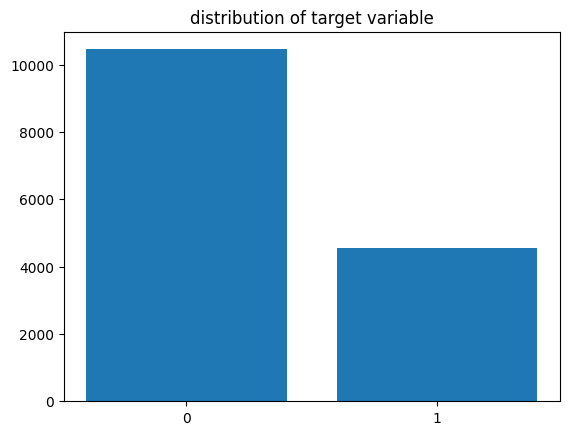

In [10]:
x=y.value_counts()
plt.bar(x.index,x)
plt.gca().set_xticks([0,1])
plt.title('distribution of target variable')
plt.show()

Before getting into encoding,I will just brief you with types data variables present in this data:
- **Binary data** : A  binary variable a variable that has only 2 values..ie 0/1
- **Categorical data** : A categorical variable is a variable that can take some limited number of values.for example,day of the week.It can be one of 1,2,3,4,5,6,7 only.
- **Ordinal data** : An ordinal variable is a categorical variable that has some order associated with it.for example,the ratings that are given to a movie by a user.
- **Nominal data** :  Nominal value is a variable that has no numerical importance,such as occupation,person name etc..
- **Timeseries data** : Time series data has a temporal value attached to it, so this would be something like a date or a time stamp that you can look for trends in time.



## Method 1: Label encoding <a id='1'></a>
In this method we change every categorical data to a number.That is each type will be subtuted by a number.for example we will substitute 1 for Grandmaster,2 for master ,3 for expert etc..
For implementing this we will first import *Labelencoder* from  *sklearn* module.

In [11]:
from sklearn.preprocessing import LabelEncoder

Now we will do these three steps to label encode our data:
- Initialize the labelencoder class
- Call the fit() method to fit the data
- Transform data to labelencoded data

In [12]:
%%time

train=pd.DataFrame()
label=LabelEncoder()
for c in  X.columns:
    if(X[c].dtype=='object'):
        train[c]=label.fit_transform(X[c])
    else:
        train[c]=X[c]

train.head(3)

CPU times: user 50.4 ms, sys: 985 μs, total: 51.4 ms
Wall time: 50.6 ms


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,1,1,1,5,5,3,...,1565,1441,2,2,1,7,3,135,2,2
1,1,0,1,0,1,1,1,4,3,5,...,605,7465,1,2,3,0,0,92,7,8
2,2,0,0,0,0,1,0,4,4,5,...,1794,5226,1,1,4,7,17,30,7,2


Here you can see the label encoded output train data.We will check the shape of train data now and verify that there is no change in the number of columns.

In [13]:

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))


train data set has got 15000 rows and 24 columns


### Logistic regression

In [14]:
def logistic(X,y, max_iter=10):
    # Convert sparse matrix to dense if needed
    if hasattr(X, 'toarray'):
        X = X.toarray()
    elif isinstance(X, pd.DataFrame):
        X = X.values
        
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=RANDOM_SEED,test_size=0.2)
    lr=LogisticRegression(max_iter=max_iter, random_state=RANDOM_SEED)  # Increase max_iter to avoid convergence warnings
    lr.fit(X_train,y_train)
    y_pre=lr.predict(X_test)
    print('Accuracy : ',accuracy_score(y_test,y_pre))

In [15]:
logistic(train,y, max_iter=200)

Accuracy :  0.7016666666666667


## Method 2 : On hot encoding  <a id='2'></a>
Our second method is encoding each category as a one hot encoding (OHE) vector (or dummy variables). OHE is a representation method that takes each category value and turns it into a binary vector of size |i|(number of values in category i) where all columns are equal to zero besides the category column. Here is a little example:   


![](https://miro.medium.com/max/878/1*WXpoiS7HXRC-uwJPYsy1Dg.png)

To implement on-hot encoding we will use *get_dummies()* function in *pandas*.



In [16]:
train=pd.get_dummies(X).astype(np.int8)
print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 15000 rows and 11937 columns


This produces output as a pandas dataframe.Alternatively we can use *OneHotEncoder()* method available in* sklearn* to convert out data to on-hot encoded data.But this method produces a sparse metrix.The advantage of this methos is that is uses very less memory/cpu resourses.
To do that,we need to :
- Import OneHotEncoder from sklean.preprocessing
- Initialize the OneHotEncoder
- Fit and then transform our data

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
%%time

one=OneHotEncoder()

one.fit(X)
train=one.transform(X)

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))



train data set has got 15000 rows and 26958 columns
CPU times: user 78.8 ms, sys: 21 μs, total: 78.8 ms
Wall time: 77.9 ms


In [19]:
logistic(train,y)

Accuracy :  0.745


## Method 3 : Feature hashing (a.k.a the hashing trick)  <a id='3'></a>

Dictionaries take up a large amount of storage space and grow in size as the training set grows. Instead of growing the vectors along with a dictionary, feature hashing builds a vector of pre-defined length by applying a hash function to the features (e.g tokens), then using the hash values directly as feature indices and updating the resulting vector at those indices. When the feature space is not large enough, hashing functions tend to map distinct values to the same hash code (collisions). As a result, it is impossible to determine what object generated by particular hash code.

Because of the above it is impossible to recover the original tokens from the feature matrix and the best approach to estimate the number of unique terms in the original dictionary is to count the number of active columns in the encoded feature matrix.

For more information, please see [here](https://scikit-learn.org/stable/auto_examples/text/plot_hashing_vs_dict_vectorizer.html#sphx-glr-auto-examples-text-plot-hashing-vs-dict-vectorizer-py).

Feature hashing is a technique to represent categories in a “one hot encoding style” as a sparse matrix but with a much lower dimensions. In feature hashing we apply a hashing function to the category and then represent it by its indices. for example, if we choose a dimension of 5 to represent “New York” we will calculate H(New York) mod 5 = 3 (for example) so New York representation will be (0,0,1,0,0).

In [20]:
from sklearn.feature_extraction import FeatureHasher

In [21]:
h = FeatureHasher(n_features=10)
D = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]
f = h.fit_transform(D)
f.toarray()

array([[ 0.,  0., -4., -1.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0., -2., -5.,  0.,  0.,  0.,  0.,  0.]])

With <code>input_type="string"</code>, the input must be an iterable over iterables of strings.

In [22]:
h = FeatureHasher(n_features=8, input_type="string")
raw_X = [["dog", "cat", "snake"], ["snake", "dog"], ["cat", "bird"]]
f = h.fit_transform(raw_X)
f.toarray()

array([[ 0.,  0.,  0., -1.,  0., -1.,  0.,  1.],
       [ 0.,  0.,  0., -1.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [23]:
%%time

X_train_hash=X.copy()
for c in X.columns:
    X_train_hash[c]=X[c].astype('str')
hashing=FeatureHasher(n_features=100, input_type='string') # default number of features is 1048576 (2 ** 20)
train=hashing.transform(X_train_hash.values)

CPU times: user 263 ms, sys: 1.21 ms, total: 264 ms
Wall time: 78.4 ms


In [24]:
print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 15000 rows and 100 columns


In [25]:
logistic(train,y)

Accuracy :  0.6966666666666667


## Method 4 :Encoding categories with dataset statistics  <a id='4'></a>

 Now we will try to give our models a numeric representation for every category with a small number of columns but with an encoding that will put similar categories close to each other. The easiest way to do it is replace every category with the number of times that we saw it in the dataset. This way if New York and New Jersey are both big cities, they will probably both appear many times in our dataset and the model will know that they are similar.

In [26]:
%%time

X_train_stat = X.copy()
for c in X_train_stat.columns:
    if X_train_stat[c].dtype == 'object':
        # Get value counts for the column
        counts = X_train_stat[c].value_counts()
        # Add small random noise to break ties
        counts = counts + np.random.rand(len(counts))/1000
        # Map the values directly using the counts
        X_train_stat[c] = X_train_stat[c].map(counts)

CPU times: user 3.68 s, sys: 2 ms, total: 3.68 s
Wall time: 66.4 ms


In [27]:
X_train_stat.head(3)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,7706.000055,9570.000156,6353.000335,1497.000901,2285.000643,1852.000186,...,11.000393,2.000663,2,3846.000199,1653.000534,1280.000377,178.000203,23.000168,2,2
1,1,0,1,0,7706.000055,9570.000156,6353.000335,5096.000497,1467.000168,5043.000100,...,6.000389,2.000683,1,3846.000199,1128.000170,1777.000279,929.000226,118.000244,7,8
2,2,0,0,0,7294.000351,9570.000156,4813.000297,5096.000497,5169.000507,5043.000100,...,18.000118,3.000982,1,1200.000466,3208.000833,1280.000377,840.000540,143.000870,7,2


In [28]:
print('train data set has got {} rows and {} columns'.format(X_train_stat.shape[0],X_train_stat.shape[1]))

train data set has got 15000 rows and 24 columns


In [29]:
logistic(X_train_stat,y)

Accuracy :  0.7016666666666667


## Encoding cyclic features  <a id='6'></a>
![](https://miro.medium.com/max/343/1*70cevmU8wNggGJEdLam1lw.png)

Some of our features are cyclic in nature.ie day,month etc.

A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.



In [30]:
%%time

X_train_cyclic=X.copy()
columns=['day','month']
for col in columns:
    X_train_cyclic[col+'_sin']=np.sin((2*np.pi*X_train_cyclic[col])/max(X_train_cyclic[col]))
    X_train_cyclic[col+'_cos']=np.cos((2*np.pi*X_train_cyclic[col])/max(X_train_cyclic[col]))
X_train_cyclic=X_train_cyclic.drop(columns,axis=1)

X_train_cyclic[['day_sin','day_cos']].head(3)

CPU times: user 99.2 ms, sys: 0 ns, total: 99.2 ms
Wall time: 10.3 ms


,day_sin,day_cos
0,9.749279e-01,-0.222521
1,-2.449294e-16,1.000000
2,-2.449294e-16,1.000000


Now we will use OnHotEncoder to encode other variables,then feed the data to our model.

In [31]:
one=OneHotEncoder()

one.fit(X_train_cyclic)
train=one.transform(X_train_cyclic)

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))


train data set has got 15000 rows and 26975 columns


In [32]:
logistic(train,y)

Accuracy :  0.748


## Method 5 : Target encoding <a id='7'></a>

Target-based encoding is numerization of categorical variables via target. In this method, we replace the categorical variable with just one new numerical variable and replace each category of the categorical variable with its corresponding probability of the target (if categorical) or average of the target (if numerical). The main drawbacks of this method are its dependency to the distribution of the target, and its lower predictability power compare to the binary encoding method.

for example,
<table style="width : 20%">
    <tr>
    <th>Country</th>
    <th>Target</th>
    </tr>
    <tr>
    <td>India</td>
    <td>1</td>
    </tr>
    <tr>
    <td>China</td>
    <td>0</td>
    </tr>
    <tr>
    <td>India</td>
    <td>0</td>
    </tr>
    <tr>
    <td>China</td>
    <td>1</td>
    </tr>
    </tr>
    <tr>
    <td>India</td>
    <td>1</td>
    </tr>
</table>



Encoding for India = [Number of true targets under the label India/ Total Number of targets under the label India]
which is 2/3 = 0.66

<table style="width : 20%">
    <tr>
    <th>Country</th>
    <th>Target</th>
    </tr>
    <tr>
    <td>India</td>
    <td>0.66</td>
    </tr>
    <tr>
    <td>China</td>
    <td>0.5</td>
    </tr>
</table>



In [33]:
%%time

X_target=df_train.copy()
X_target['day']=X_target['day'].astype('object')
X_target['month']=X_target['month'].astype('object')
for col in X_target.columns:
    if (X_target[col].dtype=='object'):
        target= dict ( X_target.groupby(col)['target'].agg('sum')/X_target.groupby(col)['target'].agg('count'))
        X_target[col]=X_target[col].replace(target).values




X_target.head(4)

CPU times: user 4.63 s, sys: 2.29 ms, total: 4.63 s
Wall time: 3.16 s


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,0.301324,0.289133,0.320793,0.352705,0.304595,0.242981,...,0.0,2,0.396516,0.252874,0.300781,0.224719,0.304348,0.314392,0.250657,0
1,1,0,1,0,0.301324,0.289133,0.320793,0.289246,0.361963,0.293080,...,0.0,1,0.396516,0.317376,0.208779,0.185145,0.372881,0.340580,0.345382,0
2,2,0,0,0,0.305045,0.289133,0.244754,0.289246,0.283227,0.293080,...,0.0,1,0.300833,0.394327,0.300781,0.363095,0.174825,0.340580,0.250657,0
3,3,0,1,0,0.305045,0.289133,0.347157,0.289246,0.304595,0.337683,...,0.5,1,0.396516,0.361093,0.319357,0.224719,0.312977,0.314392,0.240337,1


In [34]:
logistic(X_target.drop('target',axis=1),y)

Accuracy :  0.7016666666666667


### K-Fold target encoding <a id='8' ></a>

k-fold target encoding can be applied to reduce the overfitting. In this method, we divide the dataset into the k-folds, here we consider 5 folds. Fig.3 shows the first round of the 5 fold cross-validation. We calculate mean-target for fold 2, 3, 4 and 5 and we use the calculated values, mean_A = 0.556 and mean_B = 0.285 to estimate mean encoding for the fold-1.

![](https://miro.medium.com/max/1955/1*ZKD4eZXzd_FdN0SQDszFVQ.png)

In [35]:
X['target']=y
cols=X.drop(['target','id'],axis=1).columns

In [36]:
%%time

X_fold=X.copy()
X_fold[['ord_0','day','month']]=X_fold[['ord_0','day','month']].astype('object')
X_fold[['bin_3','bin_4']]=X_fold[['bin_3','bin_4']].replace({'Y':1,'N':0,'T':1,"F":0})
kf = KFold(n_splits = 5, shuffle = True)
for train_ind,val_ind in kf.split(X):
    for col in cols:
        if(X_fold[col].dtype=='object'):
            replaced=dict(X.iloc[train_ind][[col,'target']].groupby(col)['target'].mean())
            X_fold.loc[val_ind,col]=X_fold.iloc[val_ind][col].replace(replaced).values



CPU times: user 4.34 s, sys: 1.03 ms, total: 4.34 s
Wall time: 3.68 s


In [37]:
X_fold.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,1,1,0.324303,0.346088,0.311555,0.241196,...,2f4cb3d51,0.332322,0.395311,0.260902,0.287645,0.232394,0.3,0.31956,0.246955,0
1,1,0,1,0,1,1,0.316121,0.284226,0.371037,0.291356,...,0.0,0.267702,0.391803,0.331479,0.205575,0.190541,0.359551,0.335357,0.346497,0
2,2,0,0,0,0,1,0.245641,0.286689,0.281884,0.285785,...,0.0,0.266778,0.298283,0.401411,0.302619,0.369969,0.160714,0.329296,0.250134,0
3,3,0,1,0,0,1,0.350785,0.284226,0.296715,0.333982,...,0.333333,0.267702,0.391803,0.360065,0.302817,0.225352,0.323232,0.312708,0.236094,1
4,4,0,0,0,0,0,0.350717,0.294747,0.290228,0.339178,...,1.0,0.272389,0.399935,0.235758,0.224299,0.35188,0.394737,0.349242,0.350311,0


# Summary <a id='5'></a>

Here you can see the summary of our model performance against each of the encoding techniques we have used.
It is clear that OnHotEncoder together with cyclic feature encoding yielded maximum accuracy.

<table style="width : 50%">
    <tr>
    <th>Encoding</th>
    <th>Score</th>
    <th>Wall time</th>
    </tr>
    <tr>
    <td>Label Encoding</td>
    <td>0.692</td>
    <td> 973 ms</td>
    </tr>
    <tr>
    <td>OnHotEncoder</td>
    <td>0.759</td>
    <td>1.84 s</td>
    </tr>
    <tr>
    <td>Feature Hashing</td>
    <td>0.751</td>
    <td>4.96 s</td>
    </tr>
    <tr>
    <td>Dataset statistic encoding</td>
    <td>0.694</td>
    <td>894 ms</td>
    </tr>
    </tr>
    <tr>
    <td>Cyclic + OnHotEncoding</td>
    <td>0.759</td>
    <td>431 ms</td>
    </tr>
    </tr>
    <tr>
    <td>Target encoding</td>
    <td>0.694</td>
    <td>2min 5s</td>
    </tr>
    
</table>
    

**You can try two or more of this approaches together,and encode the dataset in suitable way to acheive higher accuracy**
